### Project Description

- Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
- Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

- Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

-  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

#### Dataset Description:
Number of columns: 23

- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

##### Dataset Link-  
- https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
- https://github.com/dsrscientist/dataset3


In [1]:
## Importing Necessary Libraries
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## Importing the Dataset
df = pd.read_csv('Rainfall.csv')
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


- The Dataset has 8425 rows and 23 columns 
- The feature 'Rainfall' is a continous feature and is mentioned it to be Predicted so the model will be a regression Model.
- The Dependent/Output feature is 'RainTommorrow' which has 2 types of values 'Yes/No' which makes predicting it a classification problem.

In [3]:
df[['Rainfall','RainTomorrow']]

,Rainfall,RainTomorrow
0,0.6,No
1,0.0,No
2,0.0,No
3,0.0,No
4,1.0,No
...,...,...
8420,0.0,No
8421,0.0,No
8422,0.0,No
8423,0.0,No


#### Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

##### Observations:
- There are 7 object datatype features and 16 Numerical type features
- There seems to be presence of NULL Values in the Dataset
- The feature 'date' is datetime feature ans has to be seperated in days/months/year

In [5]:
df.nunique().to_frame("Unique Values")

,Unique Values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


- Here we can see the Number of Unique values for all features

### Checking Missing and Duplicated Values

In [6]:
df.duplicated().any() # This will check if any duplicate entry or duplicate row with same value exist

True

In [7]:
## Let check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

##### Observation:
- There seems to be Duplicates rows in the Dataset.
- No whitespace, NA, '-' exist in dataset.

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

- Almost all Columns have NULL Values

##### Dropping Duplicates

In [9]:
df.drop_duplicates(inplace=True)
print(df.shape)

(6762, 23)


- After removing the Duplicate rows we have 6762 rows and 23 columns

#### Treating Missing Values

In [10]:
#Finding what percentage of data is missing from the dataset

missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values/len(df))*100
data_types = df.dtypes
missing_data = pd.concat([missing_values, percentage_missing_values, data_types], axis=1, keys=['Missing Values', '% Missing data', 'Data Types'])
print(missing_data)

               Missing Values  % Missing data Data Types
Sunshine                 3236       47.855664    float64
Evaporation              2921       43.197279    float64
Cloud3pm                 1902       28.127773    float64
Cloud9am                 1866       27.595386    float64
Pressure3pm              1311       19.387755    float64
Pressure9am              1308       19.343390    float64
WindGustDir               942       13.930790     object
WindGustSpeed             942       13.930790    float64
WindDir9am                794       11.742088     object
WindDir3pm                294        4.347826     object
Rainfall                  138        2.040816    float64
RainToday                 138        2.040816     object
RainTomorrow              138        2.040816     object
WindSpeed3pm              100        1.478852    float64
Humidity3pm                96        1.419698    float64
Temp3pm                    92        1.360544    float64
MinTemp                    70  

In [11]:
Categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical_features = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure3pm', 'Pressure9am',
            'WindGustSpeed', 'Rainfall', 'WindSpeed3pm', 'Humidity3pm', 'Temp3pm', 'MinTemp',
            'WindSpeed9am', 'MaxTemp', 'Humidity9am', 'Temp9am']

In [12]:
## We will filling the missing values of the Categorical features with mode and for MEan for NUmerical Features

# Reset index
df = df.reset_index(drop=True)

# Categorical Features

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

# Numerical features
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [13]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

- All the missing values in the Dataset have been treated Successfully

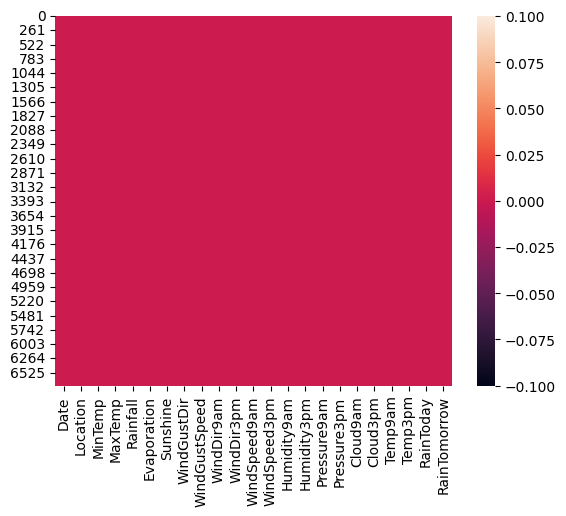

In [14]:
## Final Check with Heatmap
sns.heatmap(df.isnull())
plt.show()

In [15]:
df.shape

(6762, 23)

In [16]:
df.describe().T.style.background_gradient(subset=['mean','50%', '75%', 'max'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.000000,13.109145,5.540667,-2.000000,9.000000,13.109145,17.400000,28.500000
MaxTemp,6762.000000,24.098345,6.130123,8.200000,19.600000,23.500000,28.400000,45.500000
Rainfall,6762.000000,2.780148,10.482769,0.000000,0.000000,0.000000,1.200000,371.000000
Evaporation,6762.000000,5.302395,3.343713,0.000000,4.000000,5.302395,5.302395,145.000000
Sunshine,6762.000000,7.890896,2.733639,0.000000,7.890896,7.890896,9.200000,13.900000
WindGustSpeed,6762.000000,38.977663,13.376457,7.000000,30.000000,38.977663,46.000000,107.000000
WindSpeed9am,6762.000000,12.782206,9.787577,0.000000,6.000000,11.000000,19.000000,63.000000
WindSpeed3pm,6762.000000,17.571150,9.548634,0.000000,11.000000,17.000000,24.000000,83.000000
Humidity9am,6762.000000,67.506559,17.182700,10.000000,56.000000,68.000000,80.000000,100.000000
Humidity3pm,6762.000000,50.467147,18.498341,6.000000,38.000000,50.000000,62.000000,99.000000


- The feature 'Rainfall' has median zero and mean 2 therefore it indicates that the distribution of the feature is positively skewed or right-skewed.
- The feature 'MinTemp', 'MaxTemp', 'Evaporation','Sunshine', 'WindSpeed3pm', 'Humidity3pm', 'Temp9am', 'Temp3pm' seem to have Outliers in them

In [17]:
df[Categorical_features].describe().T.style.background_gradient(cmap='flare')

,count,unique,top,freq
WindGustDir,6762,16,E,1460
WindDir9am,6762,16,N,1403
WindDir3pm,6762,16,SE,971
RainToday,6762,2,No,5190
RainTomorrow,6762,2,No,5190


In [18]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [19]:
df['Date']

0       2008-12-01
1       2008-12-02
2       2008-12-03
3       2008-12-04
4       2008-12-05
           ...    
6757    2017-06-21
6758    2017-06-22
6759    2017-06-23
6760    2017-06-24
6761    2017-06-25
Name: Date, Length: 6762, dtype: object

- The 'Date' column appears to be a string object in DataFrame. It would be more useful to work with it as a datetime object, which allows for easy manipulation of dates and times.

In [20]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [21]:
## Dropping the Date column
df.drop('Date',axis = 1 ,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   object 
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   object 
 9   WindDir3pm     6762 non-null   object 
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

##### Seperating Numerical and Categorical features

In [23]:
Numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [24]:
df[Numerical_features]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,0.6,5.302395,7.890896,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,1,12,2008
1,7.4,25.100000,0.0,5.302395,7.890896,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,2,12,2008
2,12.9,25.700000,0.0,5.302395,7.890896,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,3,12,2008
3,9.2,28.000000,0.0,5.302395,7.890896,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,4,12,2008
4,17.5,32.300000,1.0,5.302395,7.890896,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,2.8,23.400000,0.0,5.302395,7.890896,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,21,6,2017
6758,3.6,25.300000,0.0,5.302395,7.890896,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,22,6,2017
6759,5.4,26.900000,0.0,5.302395,7.890896,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,23,6,2017
6760,7.8,27.000000,0.0,5.302395,7.890896,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24,6,2017


In [25]:
df[Categorical_features]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
6757,Uluru,E,SE,ENE,No,No
6758,Uluru,NNW,SE,N,No,No
6759,Uluru,N,SE,WNW,No,No
6760,Uluru,SE,SSE,N,No,No


- The Categorical features will be needed to convert into Numerical for Model Building

### Data Visualization

#### Univariate Analysis

- The Wind Direction 'E' has the most Data points

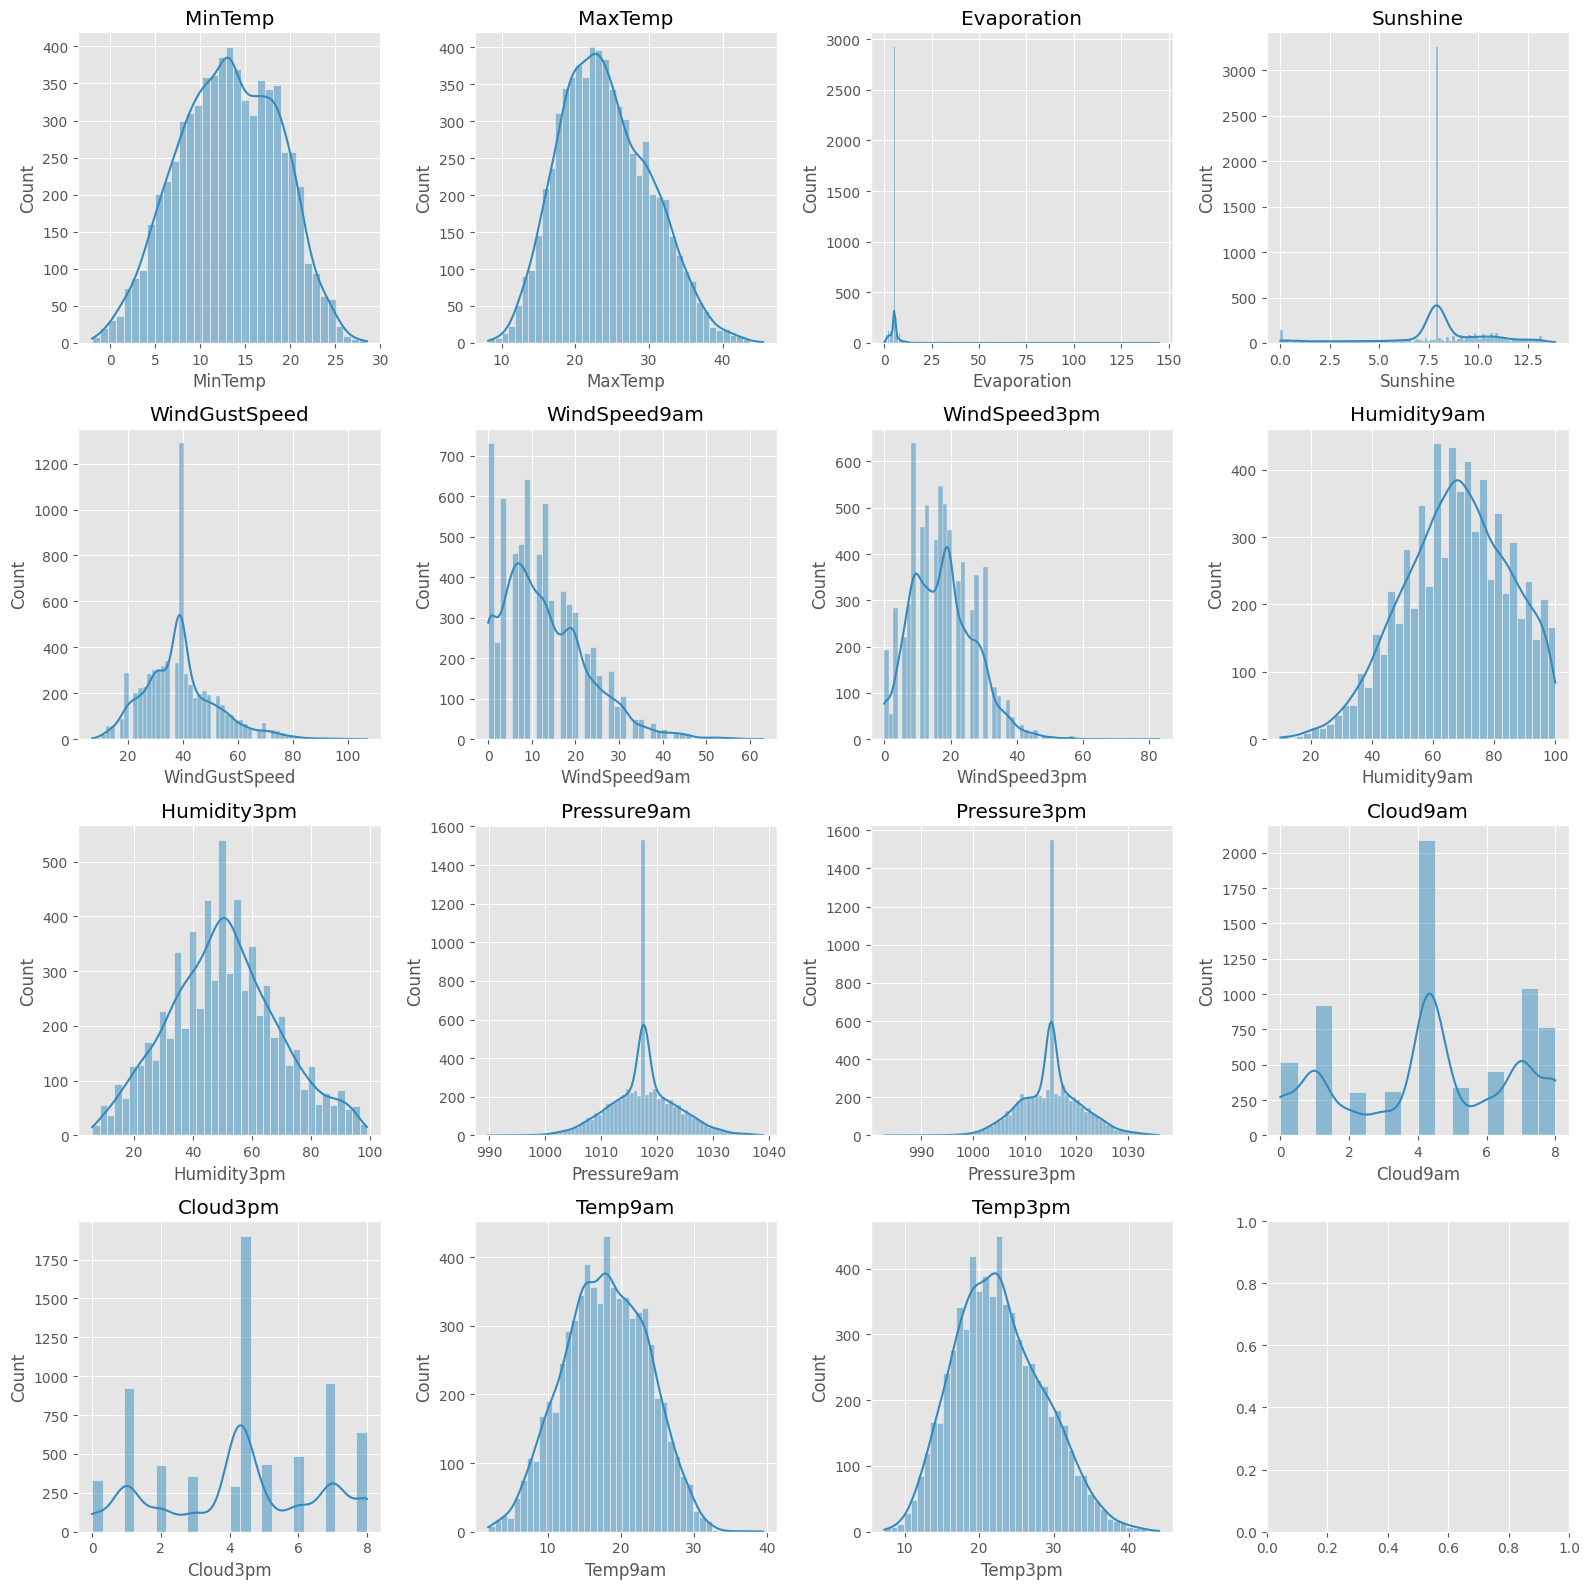

In [26]:
plt.style.use('ggplot')

# select only the numerical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
                  'Cloud3pm', 'Temp9am', 'Temp3pm']


# create subplots for the numerical features
fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(16, 16))
axs = axs.flatten()

# loop through the numerical features and plot histograms with KDE curves
for i, feature in enumerate(numerical_cols):
    sns.histplot(data=df, x=feature, kde=True, ax=axs[i], palette='viridis')
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

##### Observation
- The featurs MinTemp, Humidity3pm are normally distributed
- The feature Sunshine is not normally distributed
- The feature Max Temp, Rainfall,Evaporation, WindGustSpeed, WindSpeed9am,WindSpeed3pm is slightly skewed right
- The features Humidity9am is slightly skewed left and Humidity3pm is normally distributed.
- Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

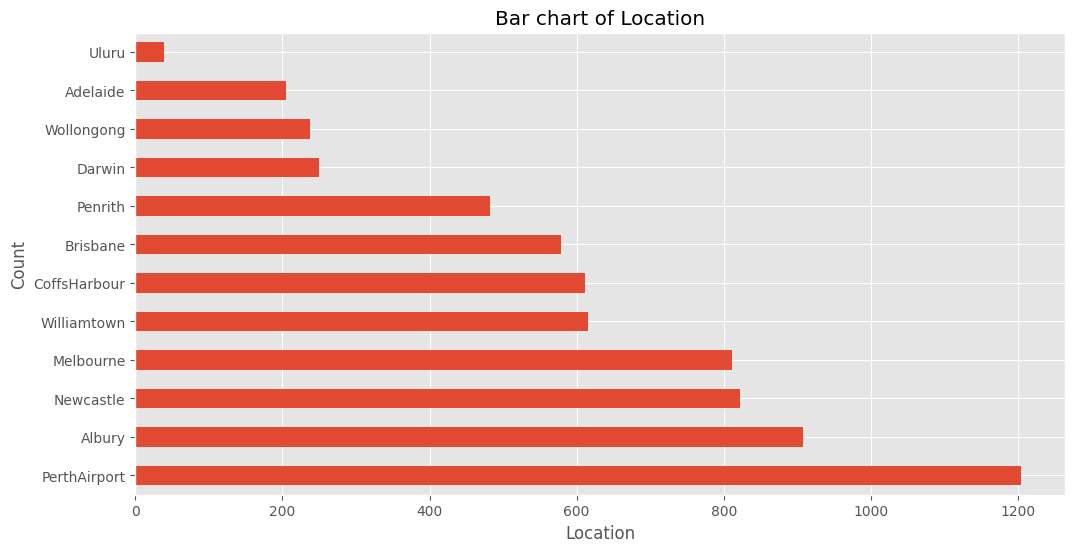

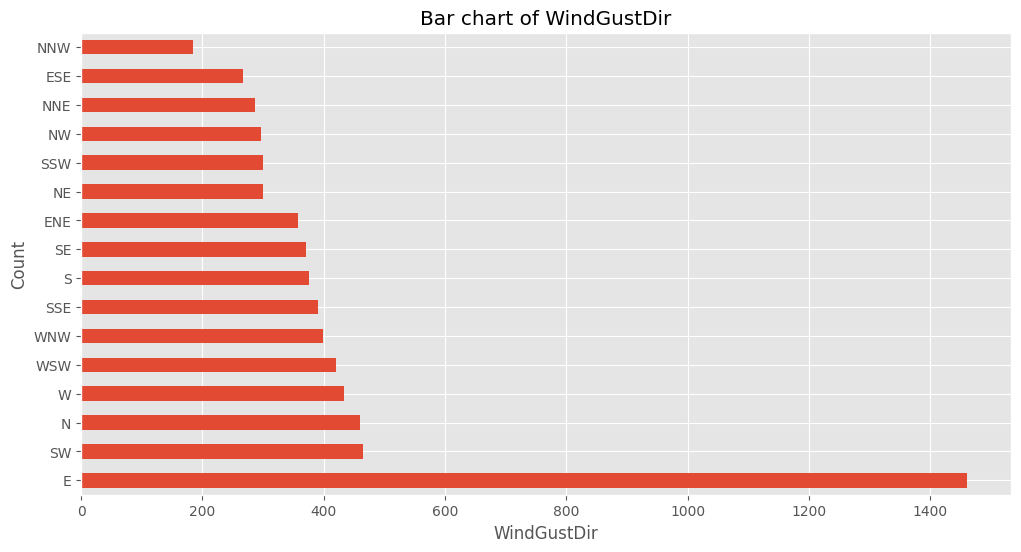

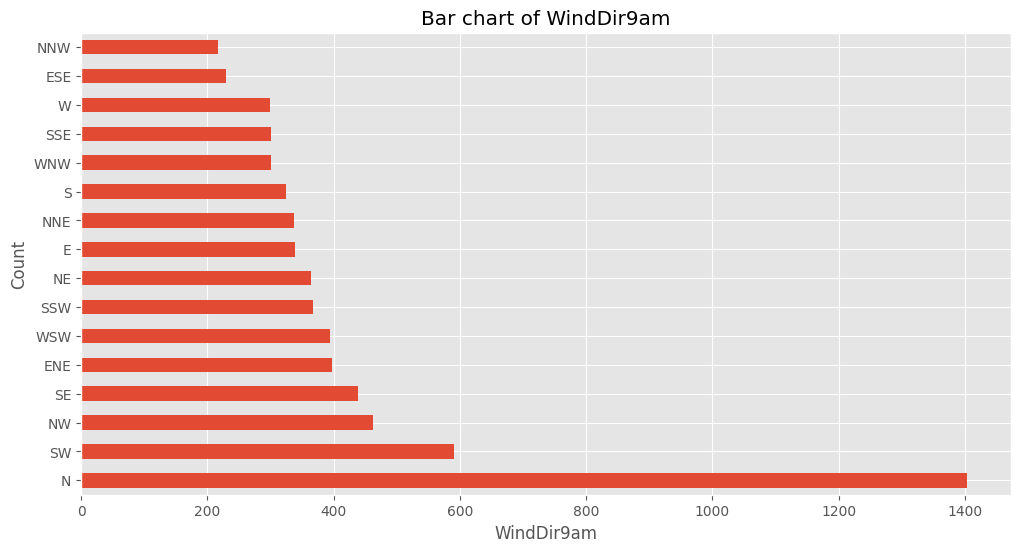

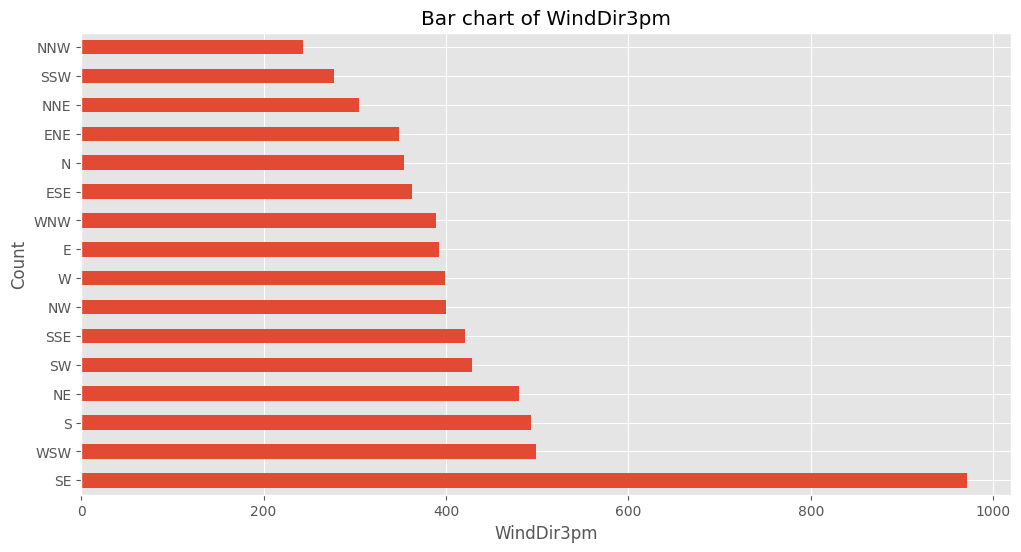

In [27]:
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().plot(kind='barh')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Bar chart of ' + col)
    plt.show()

- Here we can see the Count for all the Categorical feature in the graphs

<AxesSubplot: xlabel='Cloud3pm', ylabel='Rainfall'>

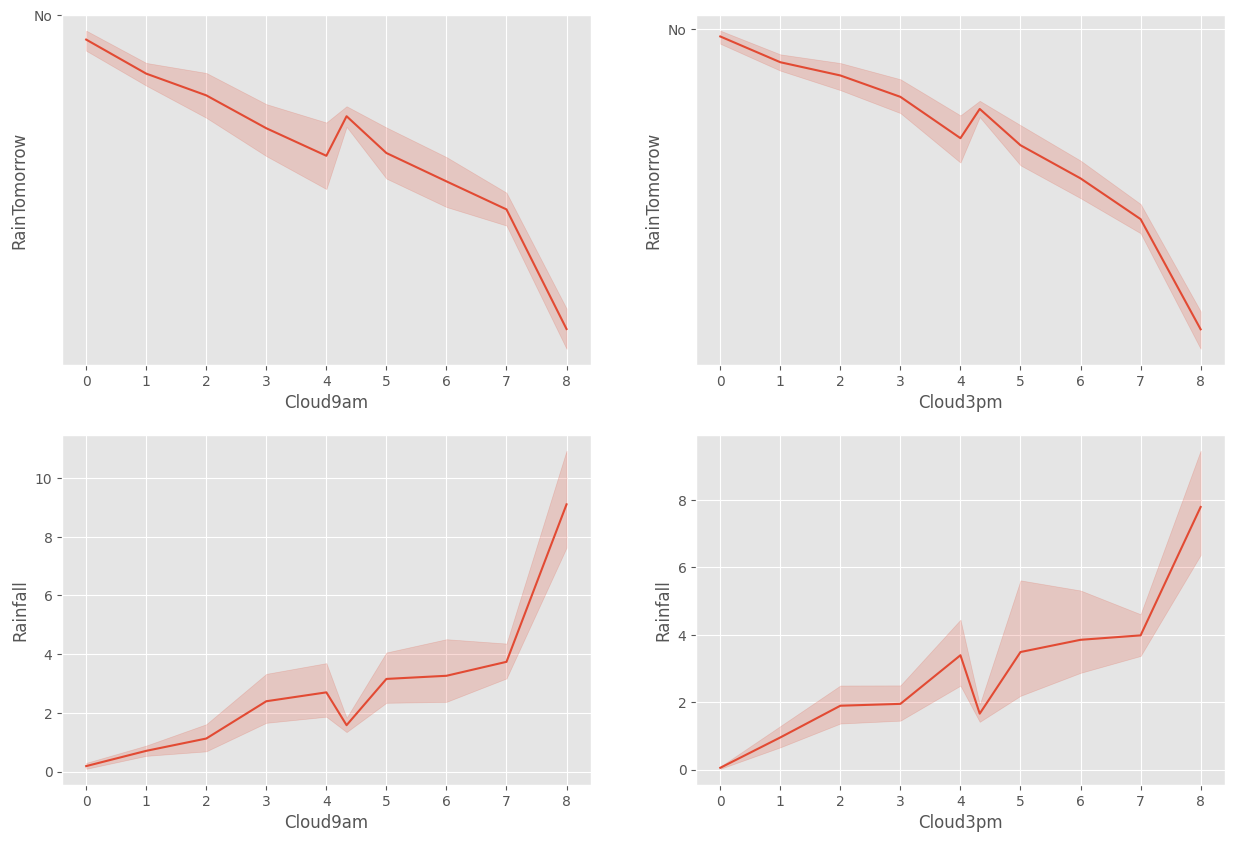

In [28]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

- The graph shows a linear relationship, and inverse relation between could and rain tomorrow and a positive relation between could and rainfall.

<AxesSubplot: xlabel='Temp3pm', ylabel='Rainfall'>

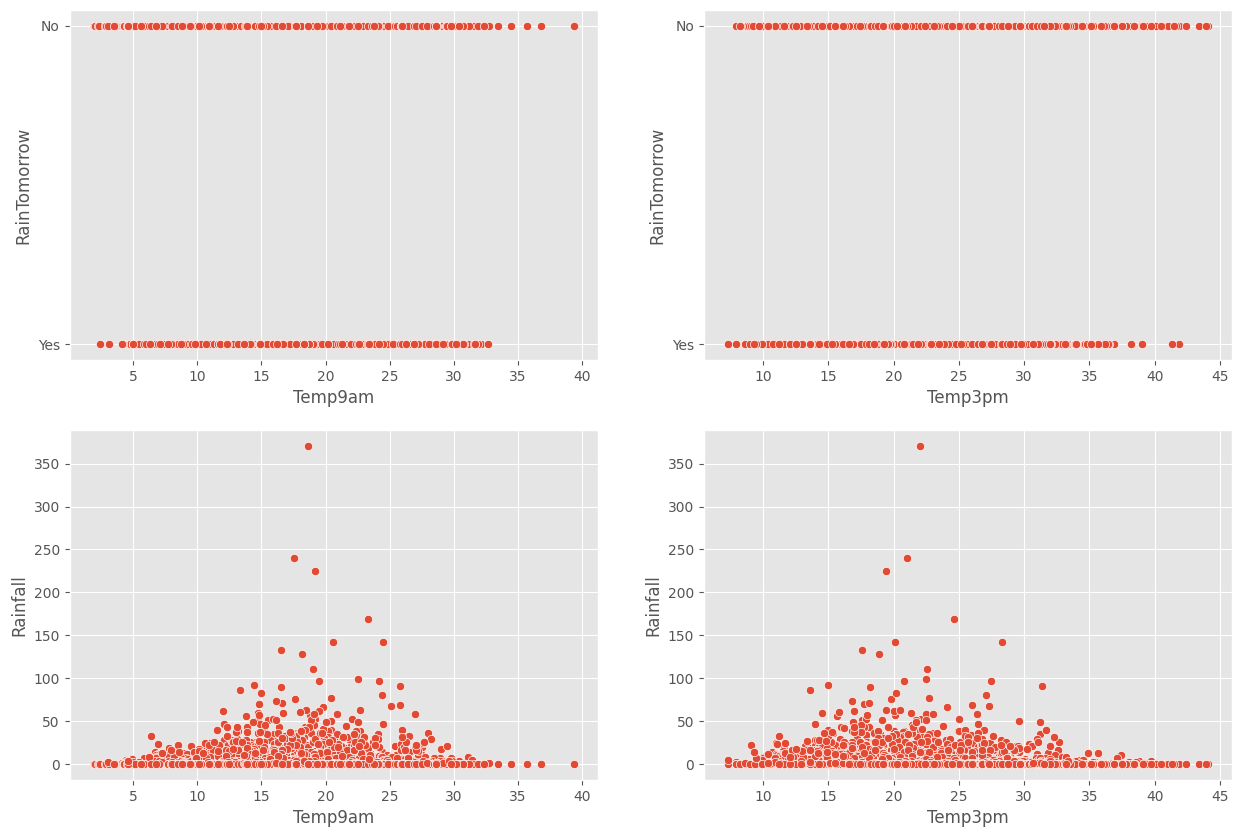

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

- No linear Relationship

Text(0.5, 1.0, 'mintemp vs location')

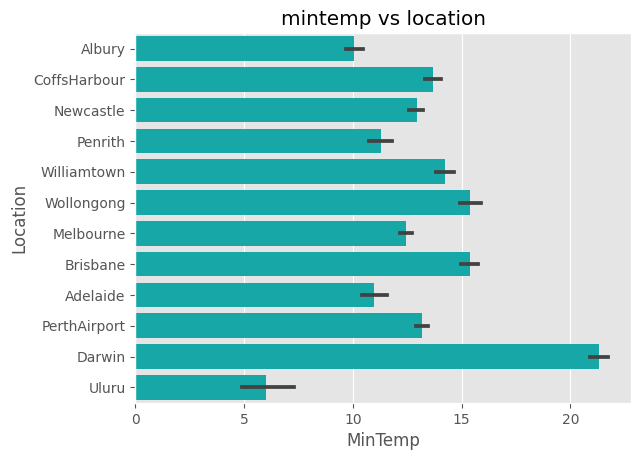

In [30]:
sns.barplot(x='MinTemp',y='Location',data=df,color='c')
plt.title("mintemp vs location")

- MinTemp at Darwin is the Highest and lowest in Uluru

Text(0.5, 1.0, 'MaxTemp vs location')

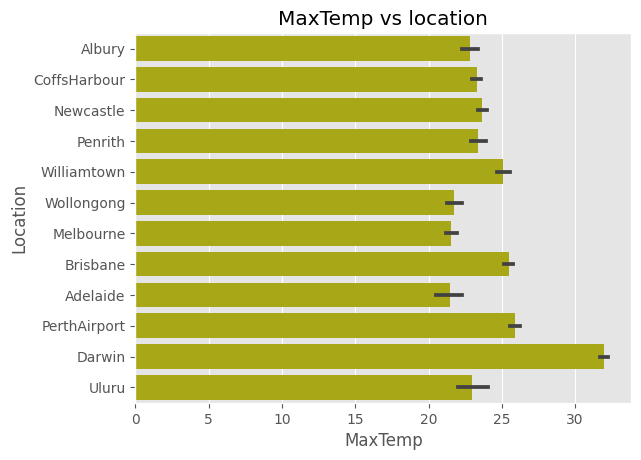

In [31]:
sns.barplot(x='MaxTemp',y='Location',data=df,color='y')
plt.title("MaxTemp vs location")

<AxesSubplot: xlabel='Year', ylabel='Rainfall'>

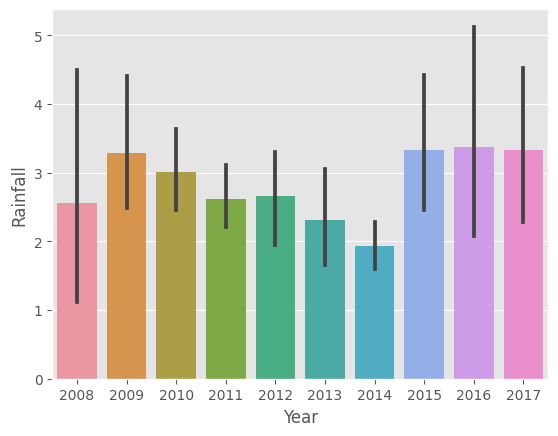

In [32]:
sns.barplot(y='Rainfall',x='Year',data=df)

Text(0.5, 1.0, 'rainfall vs year and location')

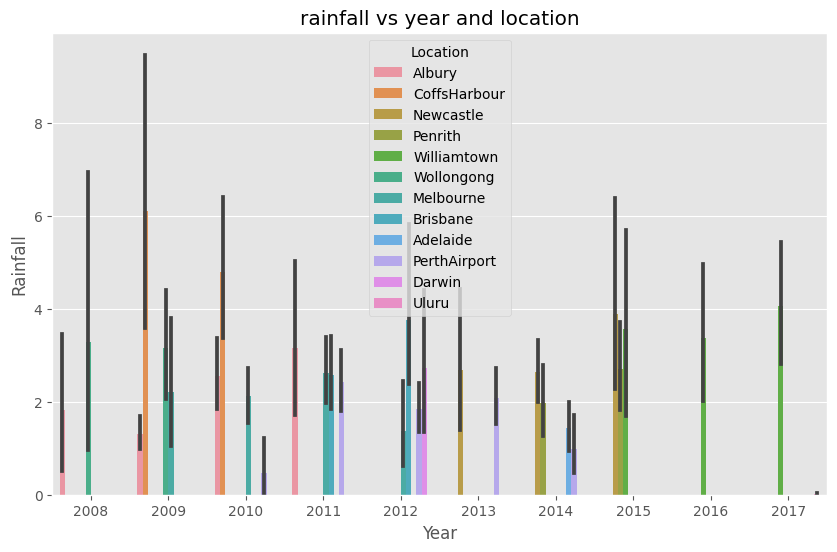

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(y='Rainfall',x='Year',data=df,hue="Location")
plt.title("rainfall vs year and location")

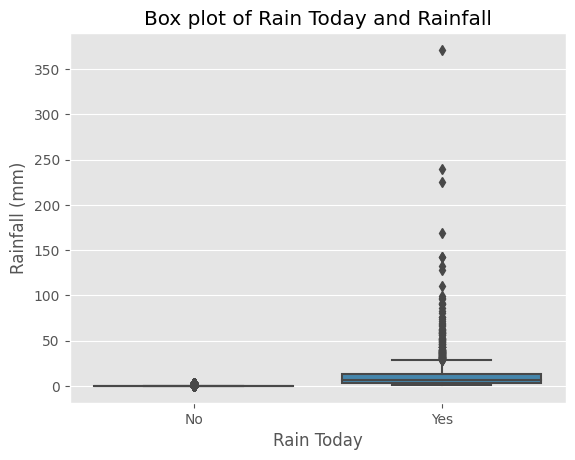

In [34]:
sns.boxplot(data=df, x='RainToday', y='Rainfall')
plt.xlabel('Rain Today')
plt.ylabel('Rainfall (mm)')
plt.title('Box plot of Rain Today and Rainfall')
plt.show()

<AxesSubplot: xlabel='MaxTemp', ylabel='MinTemp'>

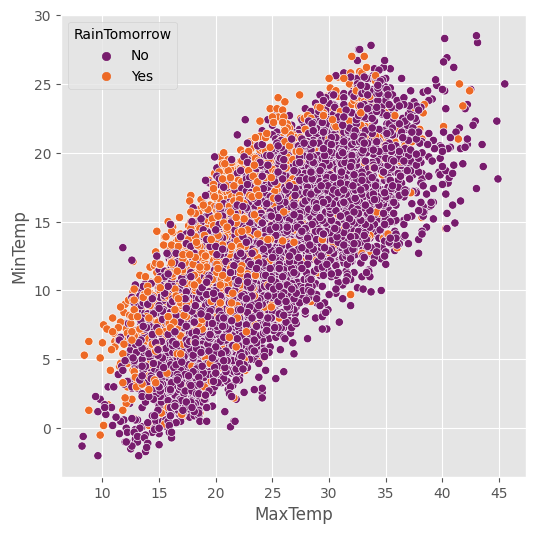

In [35]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='MaxTemp' , y='MinTemp', hue='RainTomorrow', palette='inferno', data=df)

<AxesSubplot: xlabel='Humidity9am', ylabel='Temp9am'>

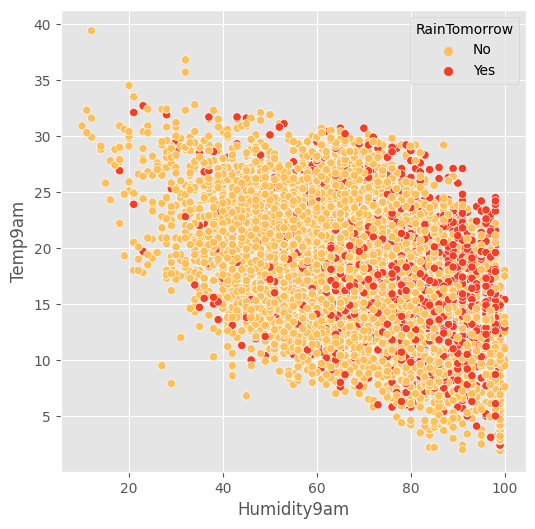

In [36]:

plt.figure(figsize=(6,6))
sns.scatterplot(x='Humidity9am' , y='Temp9am', hue='RainTomorrow', palette='YlOrRd', data=df)

### Encoding the Categorical Features

In [37]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [38]:
Categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',]

# Converting categorical columns using label encoder
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for i in Categorical_features:
    df[i] = label.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.302395,7.890896,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.302395,7.890896,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.302395,7.890896,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.302395,7.890896,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.302395,7.890896,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [39]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Day                int64
Month              int64
Year               int64
dtype: object

- We have Encoded all Categorical Features

### Outlier Detection

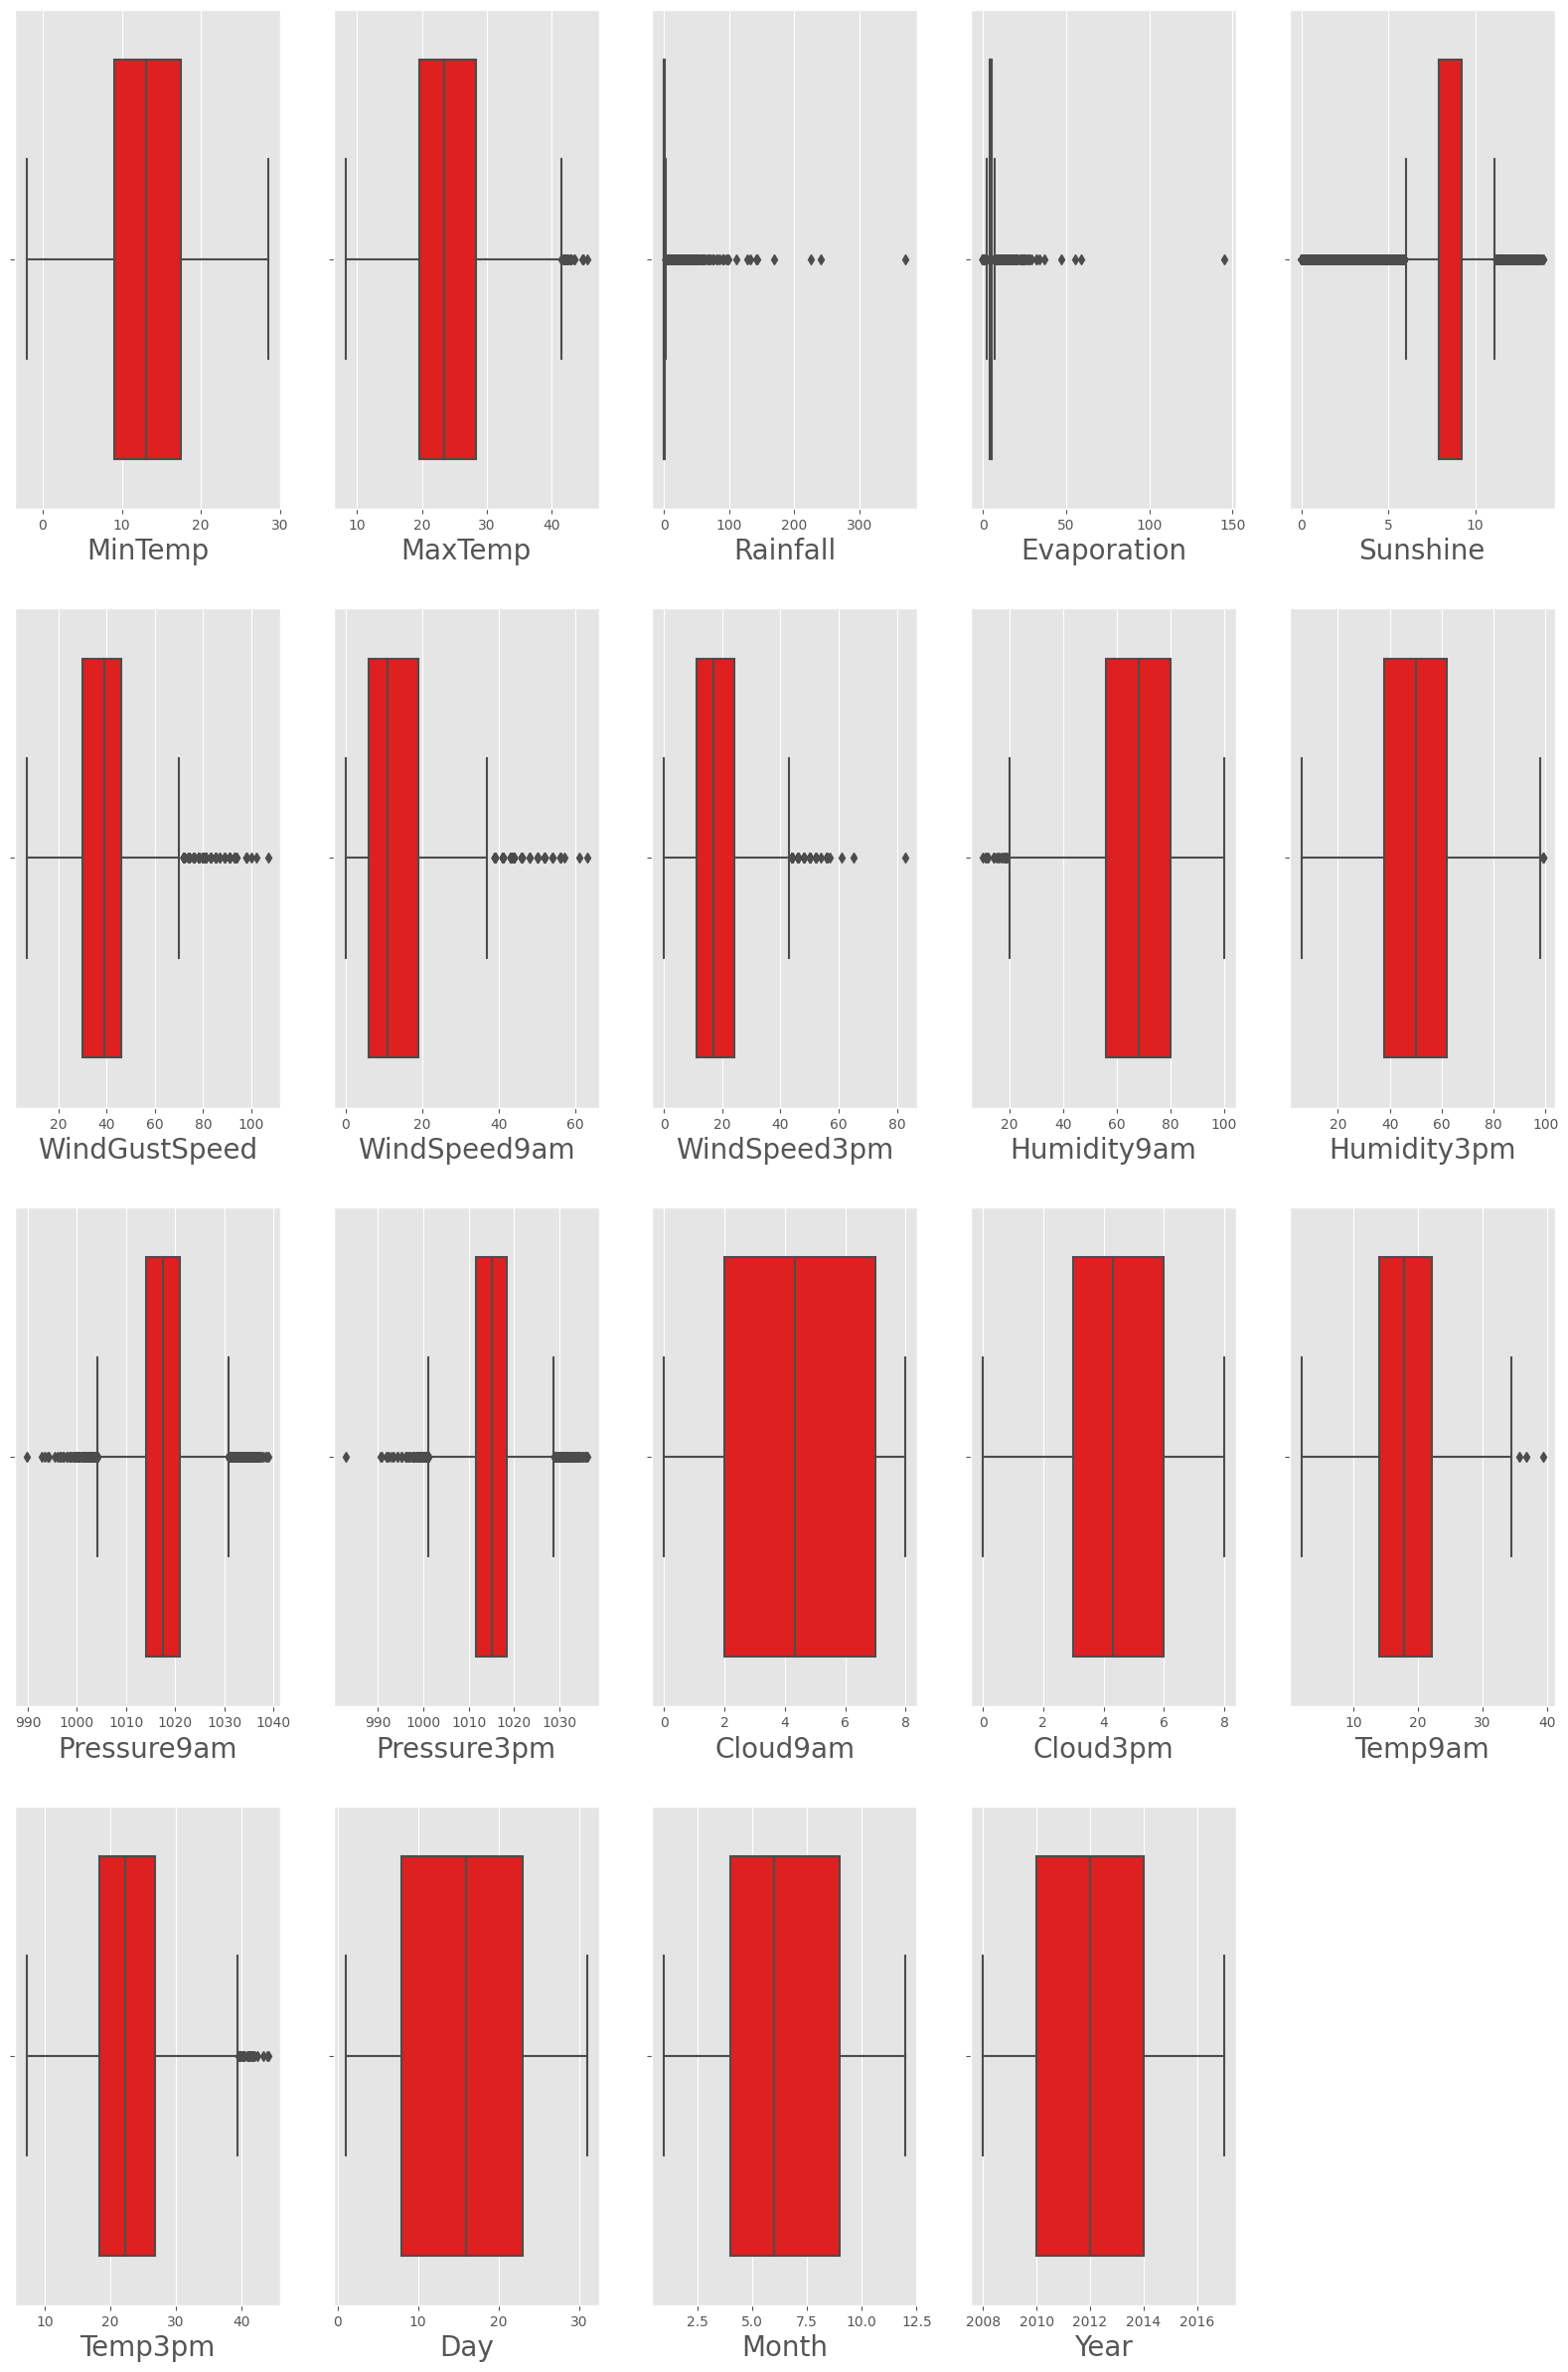

In [40]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=21:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


- There seems to be Outliers present in most of the Numerical Columns in the Dataset which needs to be treated

### Outlier Removal

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (6762, 25)
Shape of the dataframe after removing outliers:  (6409, 25)
Percentage of data loss post outlier removal:  5.220349009168885


- The Dataloss after Outlier Removal is 5.22 % which is Acceptable

### Skewness

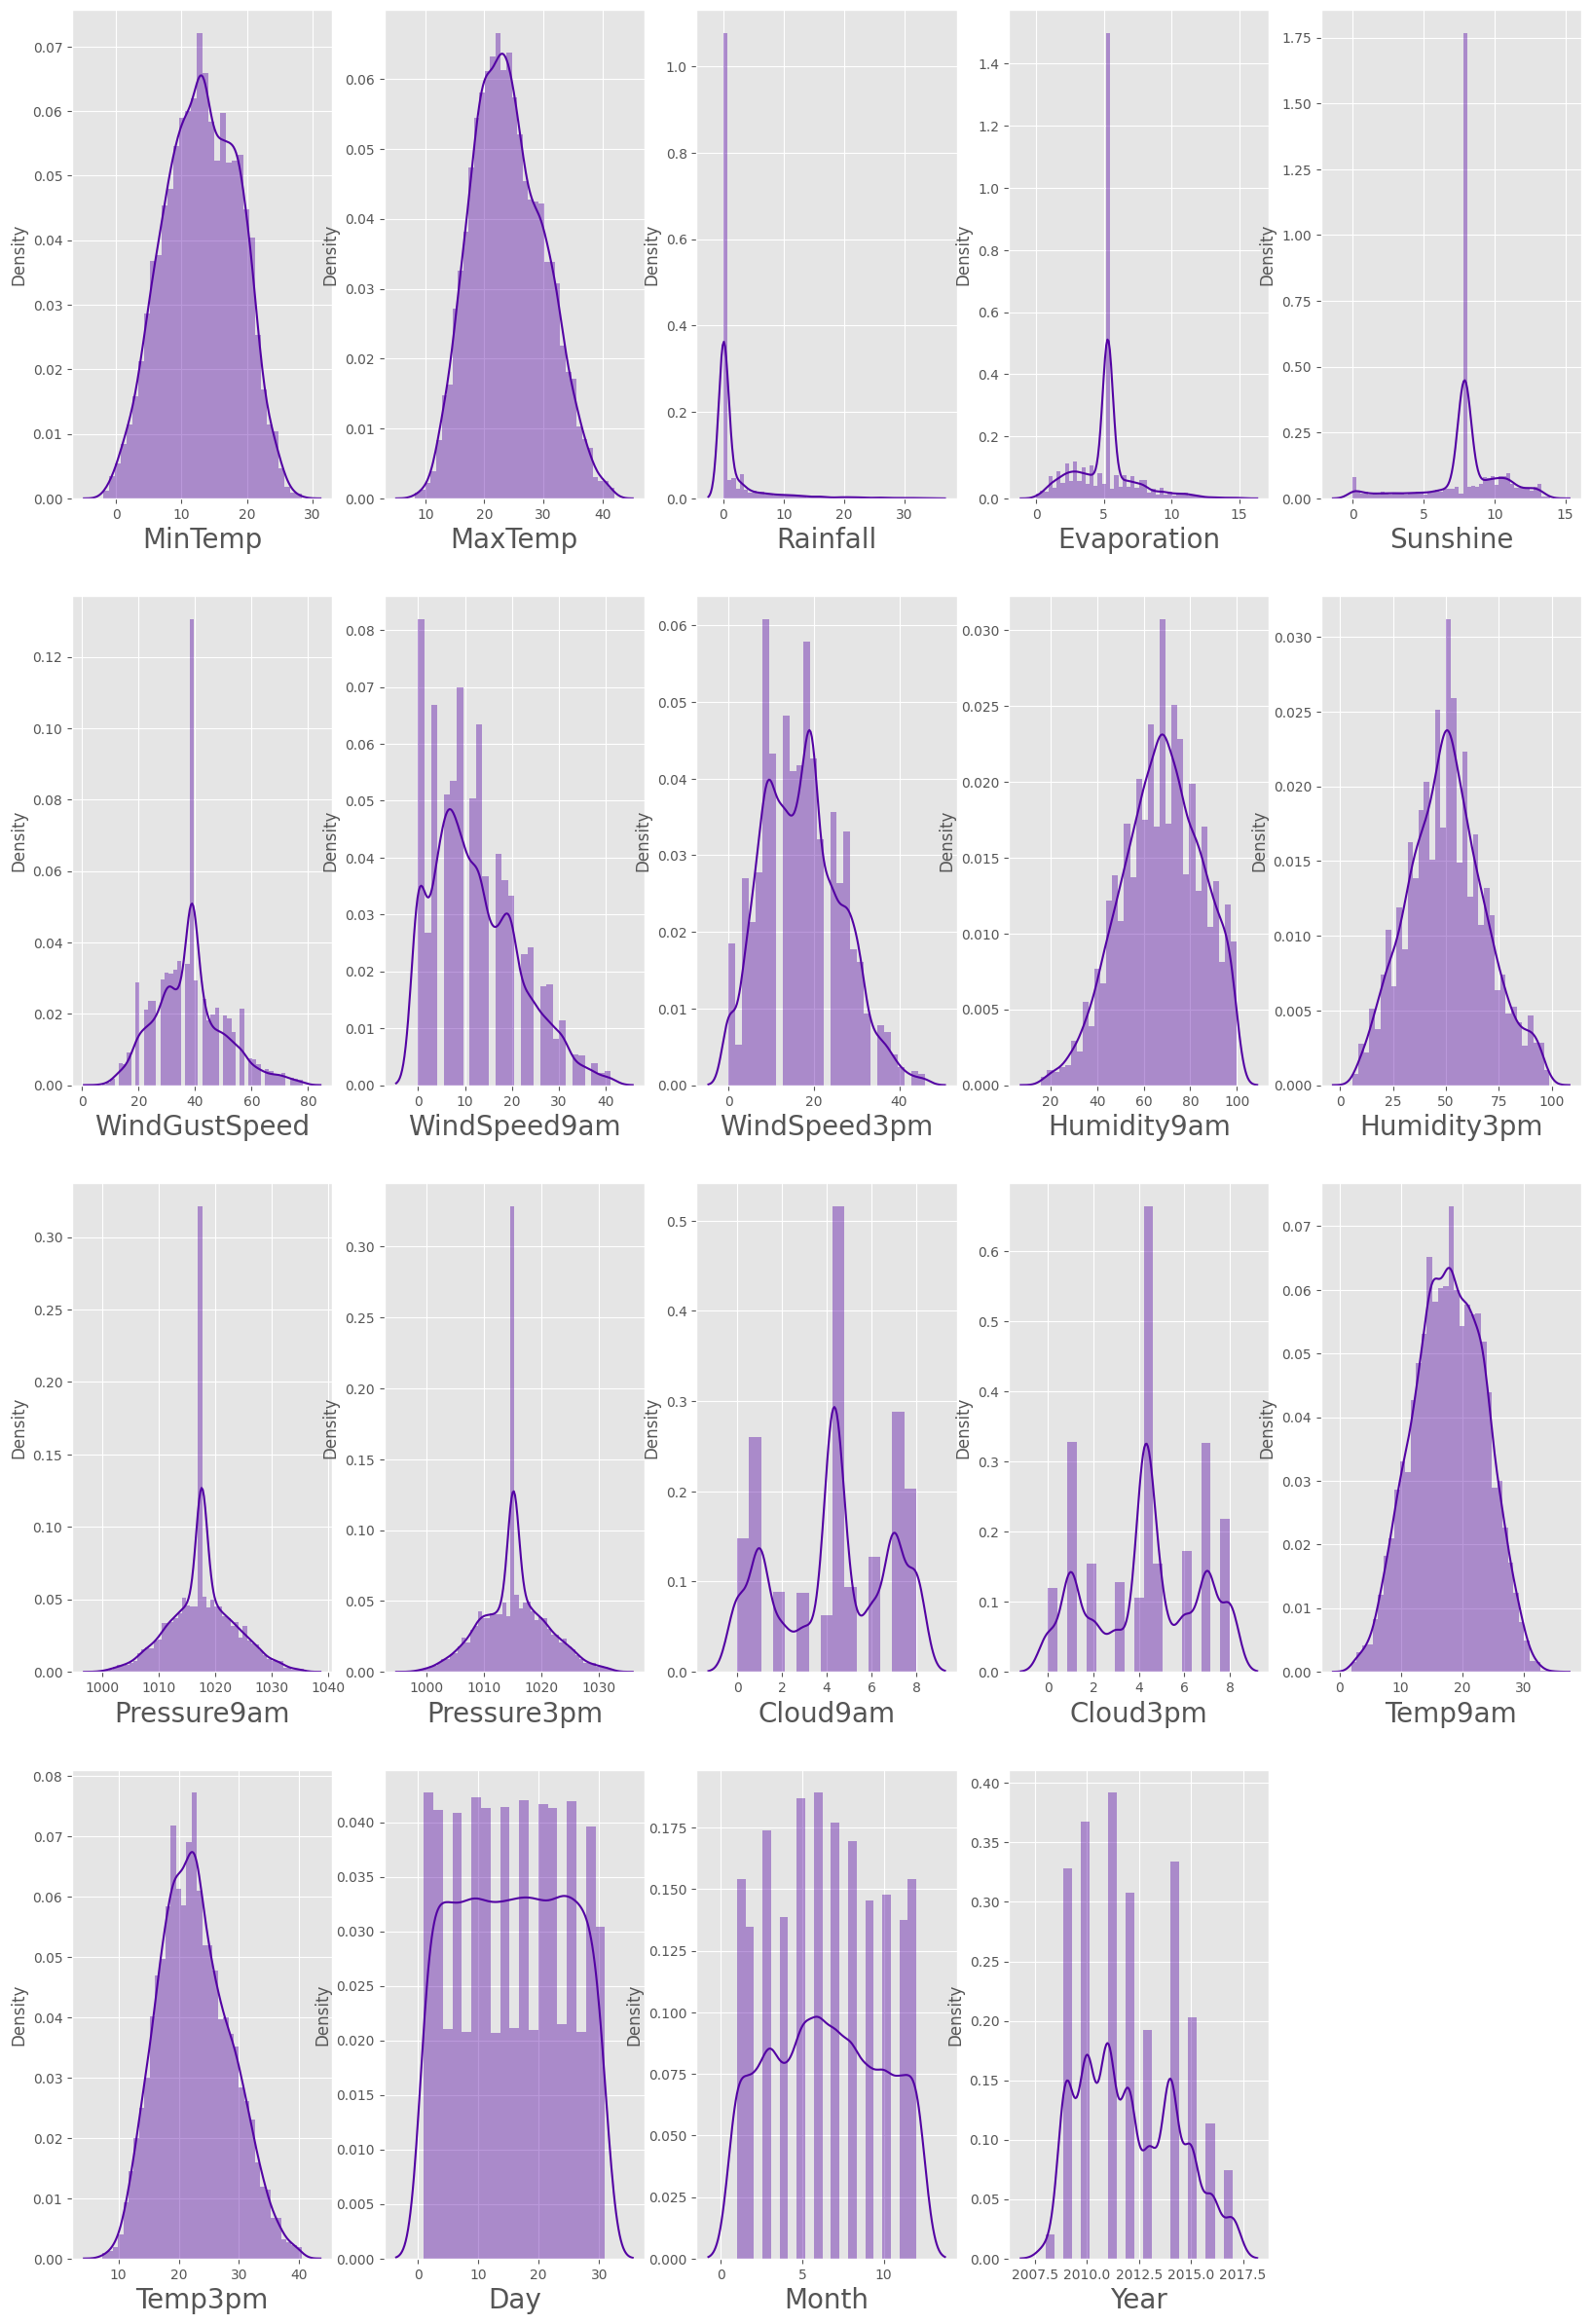

In [42]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical_features:
    if plotnum<=21:
        plt.subplot(4,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [43]:
df[Numerical_features].skew().sort_values()

Sunshine        -0.890629
Humidity9am     -0.233044
Cloud9am        -0.203578
Cloud3pm        -0.147217
MinTemp         -0.079107
Temp9am         -0.072513
Day              0.004771
Month            0.032770
Pressure9am      0.064023
Pressure3pm      0.090093
Humidity3pm      0.158509
MaxTemp          0.265797
Temp3pm          0.290192
WindSpeed3pm     0.341549
Year             0.352924
WindGustSpeed    0.477235
WindSpeed9am     0.677433
Evaporation      0.721400
Rainfall         3.515410
dtype: float64

- All the features are Normally Distributed and in range of +0.5 to -0.5 other than Evaporation , sunshine, WindSpeed9am      

In [44]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['Evaporation','Sunshine', 'WindSpeed9am']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [45]:
df[Numerical_features].skew().sort_values()

Humidity9am     -0.233044
Cloud9am        -0.203578
Cloud3pm        -0.147217
WindSpeed9am    -0.132158
MinTemp         -0.079107
Temp9am         -0.072513
Sunshine        -0.054513
Day              0.004771
Month            0.032770
Pressure9am      0.064023
Evaporation      0.071784
Pressure3pm      0.090093
Humidity3pm      0.158509
MaxTemp          0.265797
Temp3pm          0.290192
WindSpeed3pm     0.341549
Year             0.352924
WindGustSpeed    0.477235
Rainfall         3.515410
dtype: float64

- We have successfully handled skewness

### Correlation

In [46]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.091439,0.073529,0.010711,0.119698,0.061905,-0.087036,0.275369,-0.102857,-0.000346,0.233049,0.224873,-0.033365,-0.000397,-0.032044,-0.018320,-0.006174,-0.005406,0.098705,0.069773,-0.004653,0.000418,-0.004955,-0.070870,0.504670
MinTemp,0.091439,1.000000,0.730203,0.101291,0.359824,0.079087,-0.141975,0.243945,-0.021262,-0.143715,0.193323,0.195641,-0.149362,0.078620,-0.447278,-0.447642,0.095244,0.045078,0.892887,0.699067,0.072751,0.093202,0.018823,-0.235576,0.033619
MaxTemp,0.073529,0.730203,1.000000,-0.137986,0.470427,0.383131,-0.203423,0.170578,-0.193433,-0.165553,0.072636,0.124107,-0.415573,-0.417667,-0.348992,-0.426387,-0.240845,-0.239589,0.865352,0.974864,-0.219715,-0.158541,0.020013,-0.173102,0.084633
Rainfall,0.010711,0.101291,-0.137986,1.000000,-0.112222,-0.192258,0.073778,0.095182,0.120300,0.073660,0.039957,0.032481,0.305620,0.302908,-0.117134,-0.056897,0.240989,0.198723,-0.029414,-0.147791,0.694824,0.277606,-0.006935,-0.001506,0.004145
Evaporation,0.119698,0.359824,0.470427,-0.112222,1.000000,0.424137,-0.139166,0.204408,-0.131351,-0.025713,0.098391,0.104653,-0.328227,-0.248827,-0.283960,-0.304517,-0.112710,-0.160846,0.421538,0.459295,-0.180903,-0.108688,0.005752,-0.050976,0.123489
Sunshine,0.061905,0.079087,0.383131,-0.192258,0.424137,1.000000,-0.096939,0.061952,-0.084721,-0.059172,0.071935,0.096984,-0.414338,-0.438855,-0.040731,-0.101831,-0.551708,-0.572568,0.280580,0.400171,-0.241604,-0.329748,-0.001181,0.000992,0.021854
WindGustDir,-0.087036,-0.141975,-0.203423,0.073778,-0.139166,-0.096939,1.000000,-0.005278,0.382238,0.455730,0.132177,0.150137,0.009154,0.017709,-0.085851,-0.007103,0.113797,0.074331,-0.158044,-0.214280,0.108601,0.034610,0.016953,0.033051,-0.184693
WindGustSpeed,0.275369,0.243945,0.170578,0.095182,0.204408,0.061952,-0.005278,1.000000,-0.070025,0.090029,0.521154,0.613722,-0.272013,-0.102397,-0.362831,-0.327380,-0.001037,0.036077,0.224148,0.138991,0.077282,0.163628,-0.003702,0.049319,-0.014431
WindDir9am,-0.102857,-0.021262,-0.193433,0.120300,-0.131351,-0.084721,0.382238,-0.070025,1.000000,0.207631,0.148523,0.057010,-0.000528,0.120313,-0.021750,0.058118,0.070864,0.054555,-0.067048,-0.202146,0.149524,0.034901,-0.007416,0.022424,-0.083633
WindDir3pm,-0.000346,-0.143715,-0.165553,0.073660,-0.025713,-0.059172,0.455730,0.090029,0.207631,1.000000,0.029382,0.098298,-0.004435,-0.012217,-0.130442,-0.040758,0.070165,0.049111,-0.150565,-0.176777,0.095603,-0.000224,0.001373,0.029937,0.005251


- Lets see the Heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'Location'),
  Text(0, 1.5, 'MinTemp'),
  Text(0, 2.5, 'MaxTemp'),
  Text(0, 3.5, 'Rainfall'),
  Text(0, 4.5, 'Evaporation'),
  Text(0, 5.5, 'Sunshine'),
  Text(0, 6.5, 'WindGustDir'),
  Text(0, 7.5, 'WindGustSpeed'),
  Text(0, 8.5, 'WindDir9am'),
  Text(0, 9.5, 'WindDir3pm'),
  Text(0, 10.5, 'WindSpeed9am'),
  Text(0, 11.5, 'WindSpeed3pm'),
  Text(0, 12.5, 'Humidity9am'),
  Text(0, 13.5, 'Humidity3pm'),
  Text(0, 14.5, 'Pressure9am'),
  Text(0, 15.5, 'Pressure3pm'),
  Text(0, 16.5, 'Cloud9am'),
  Text(0, 17.5, 'Cloud3pm'),
  Text(0, 18.5, 'Temp9am'),
  Text(0, 19.5, 'Temp3pm'),
  Text(0, 20.5, 'RainToday'),
  Text(0, 21.5, 'RainTomorrow'),
  Text(0, 22.5, 'Day'),
  Text(0, 23.5, 'Month'),
  Text(0, 24.5, 'Year')])

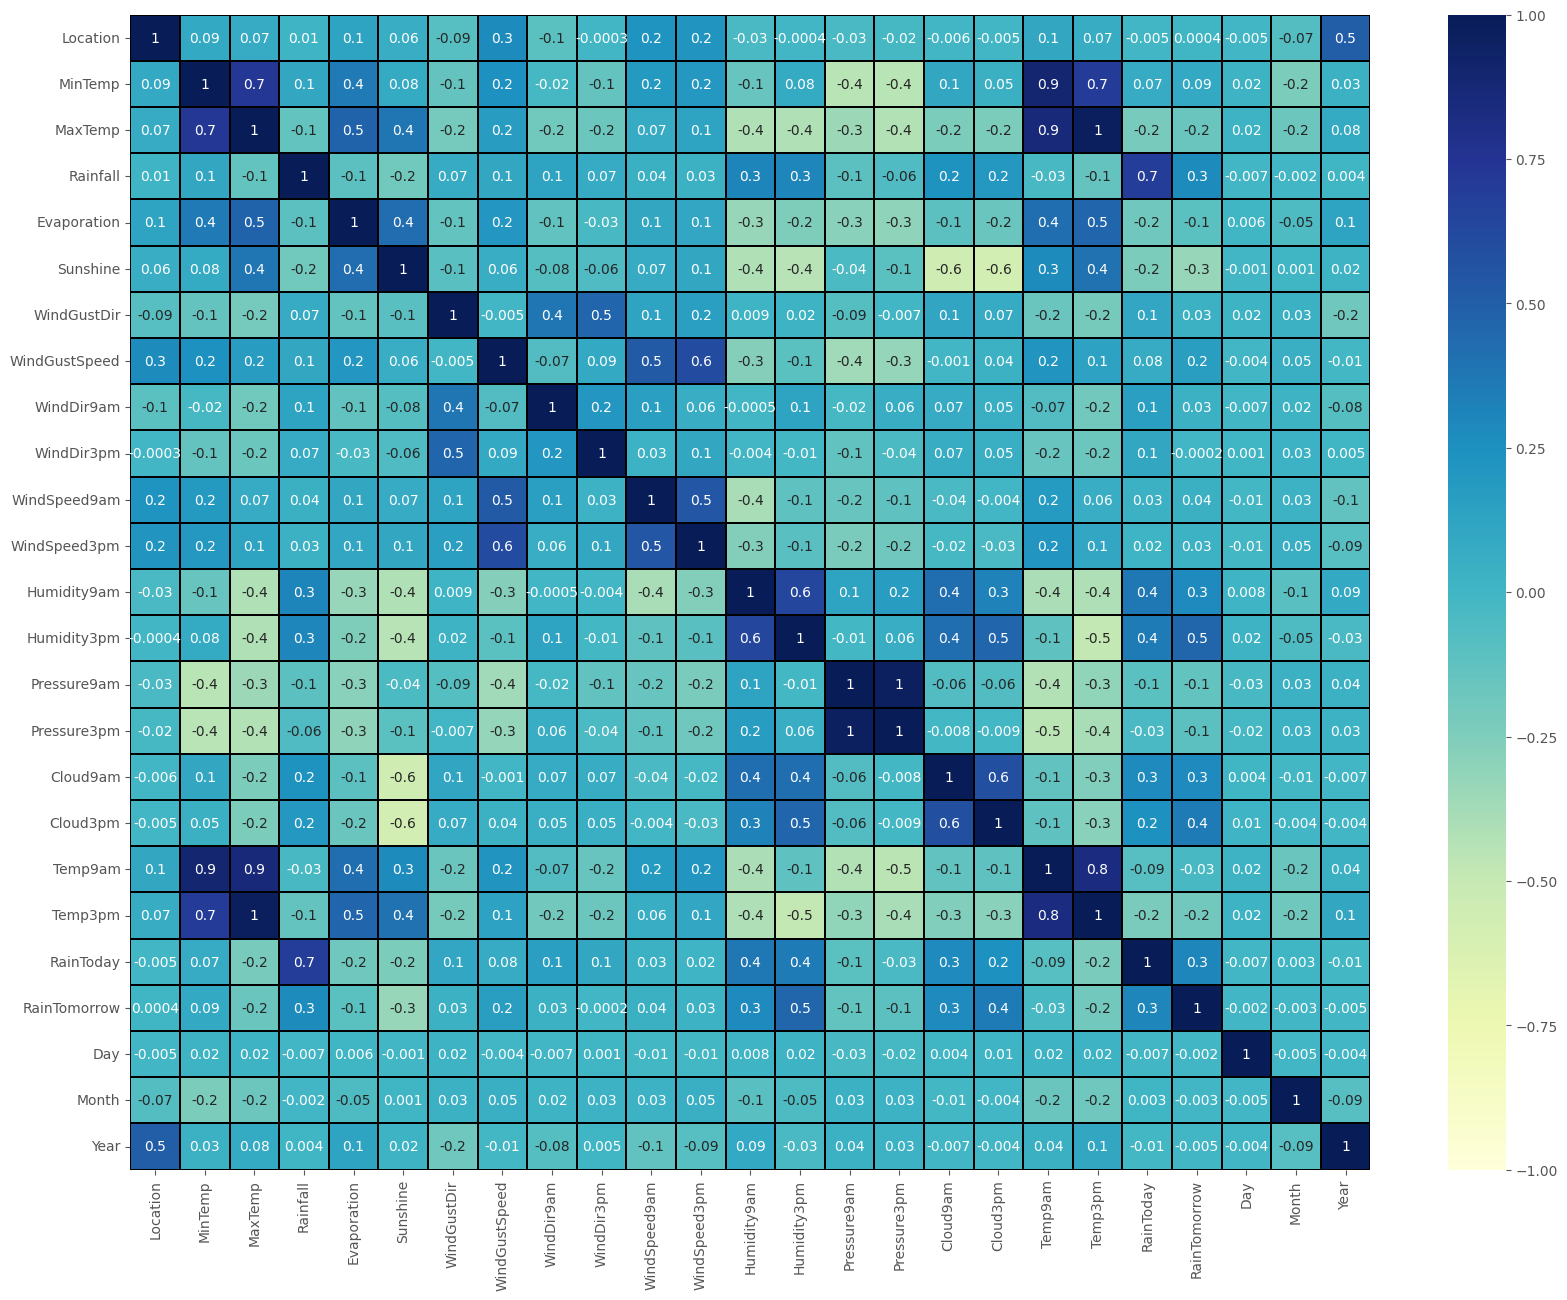

In [47]:
plt.figure(figsize=(20,15))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0)

- From the above heatmap we can see that there is seems to be presence of Multicollinearity between the features

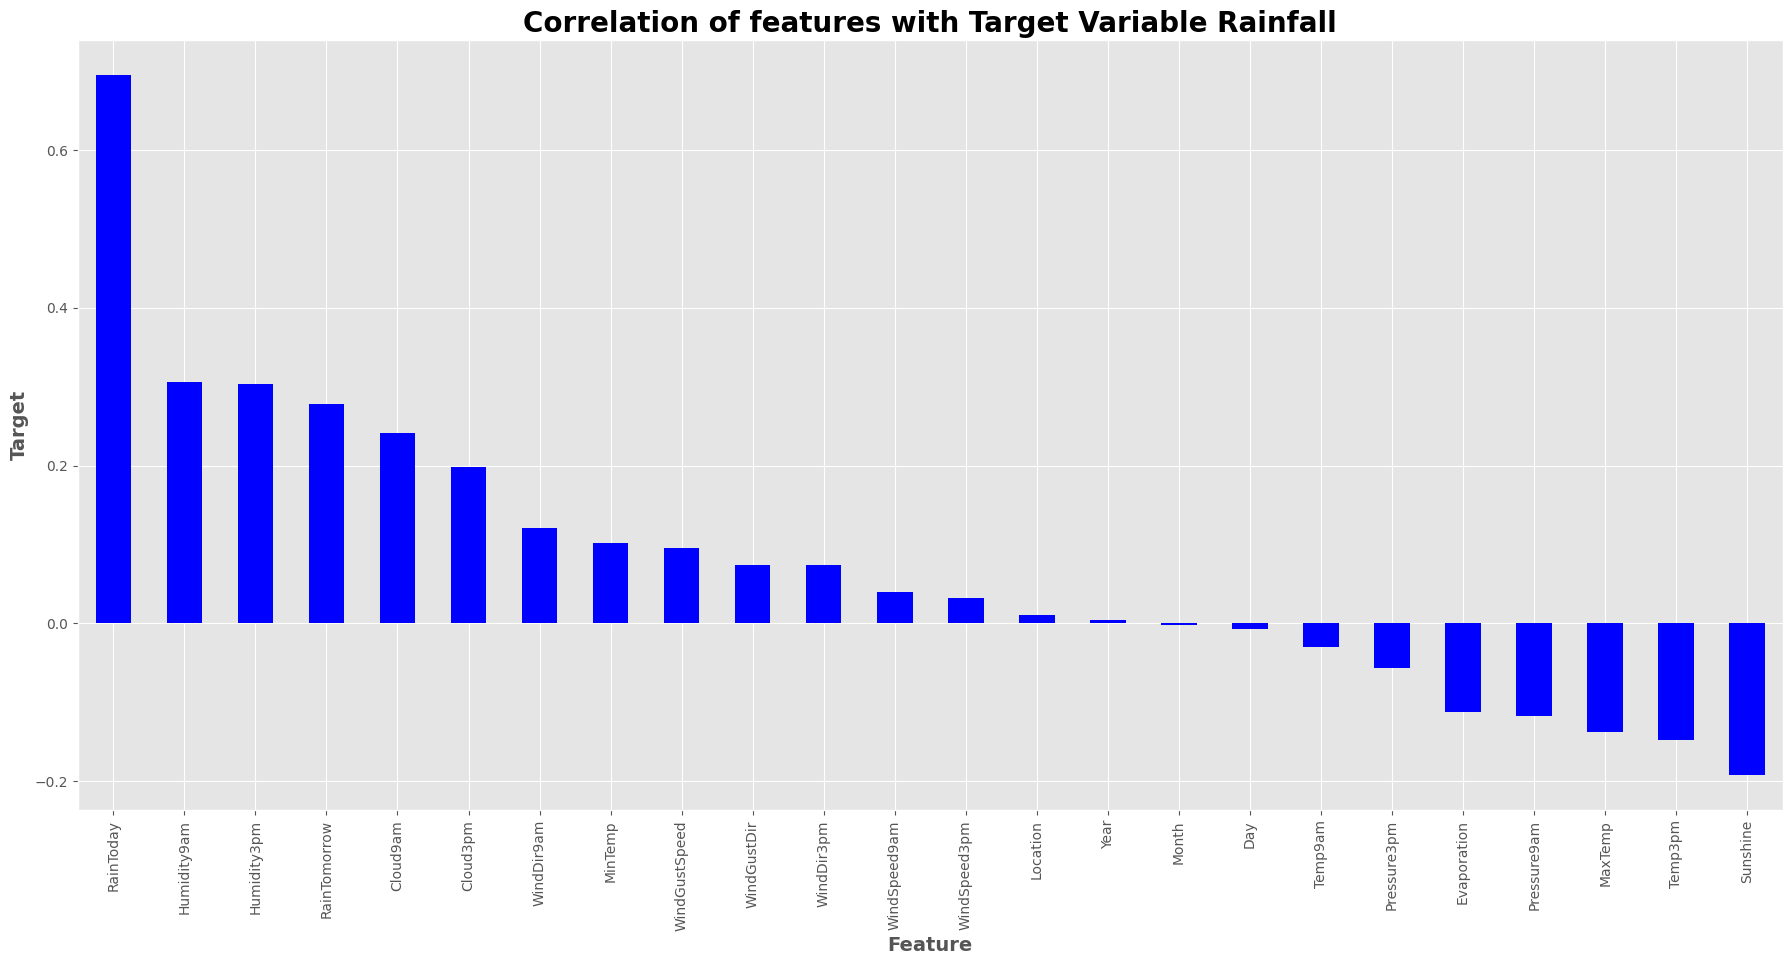

In [47]:
plt.figure(figsize=(22,10))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Rainfall',fontsize=20,fontweight='bold')
plt.show()

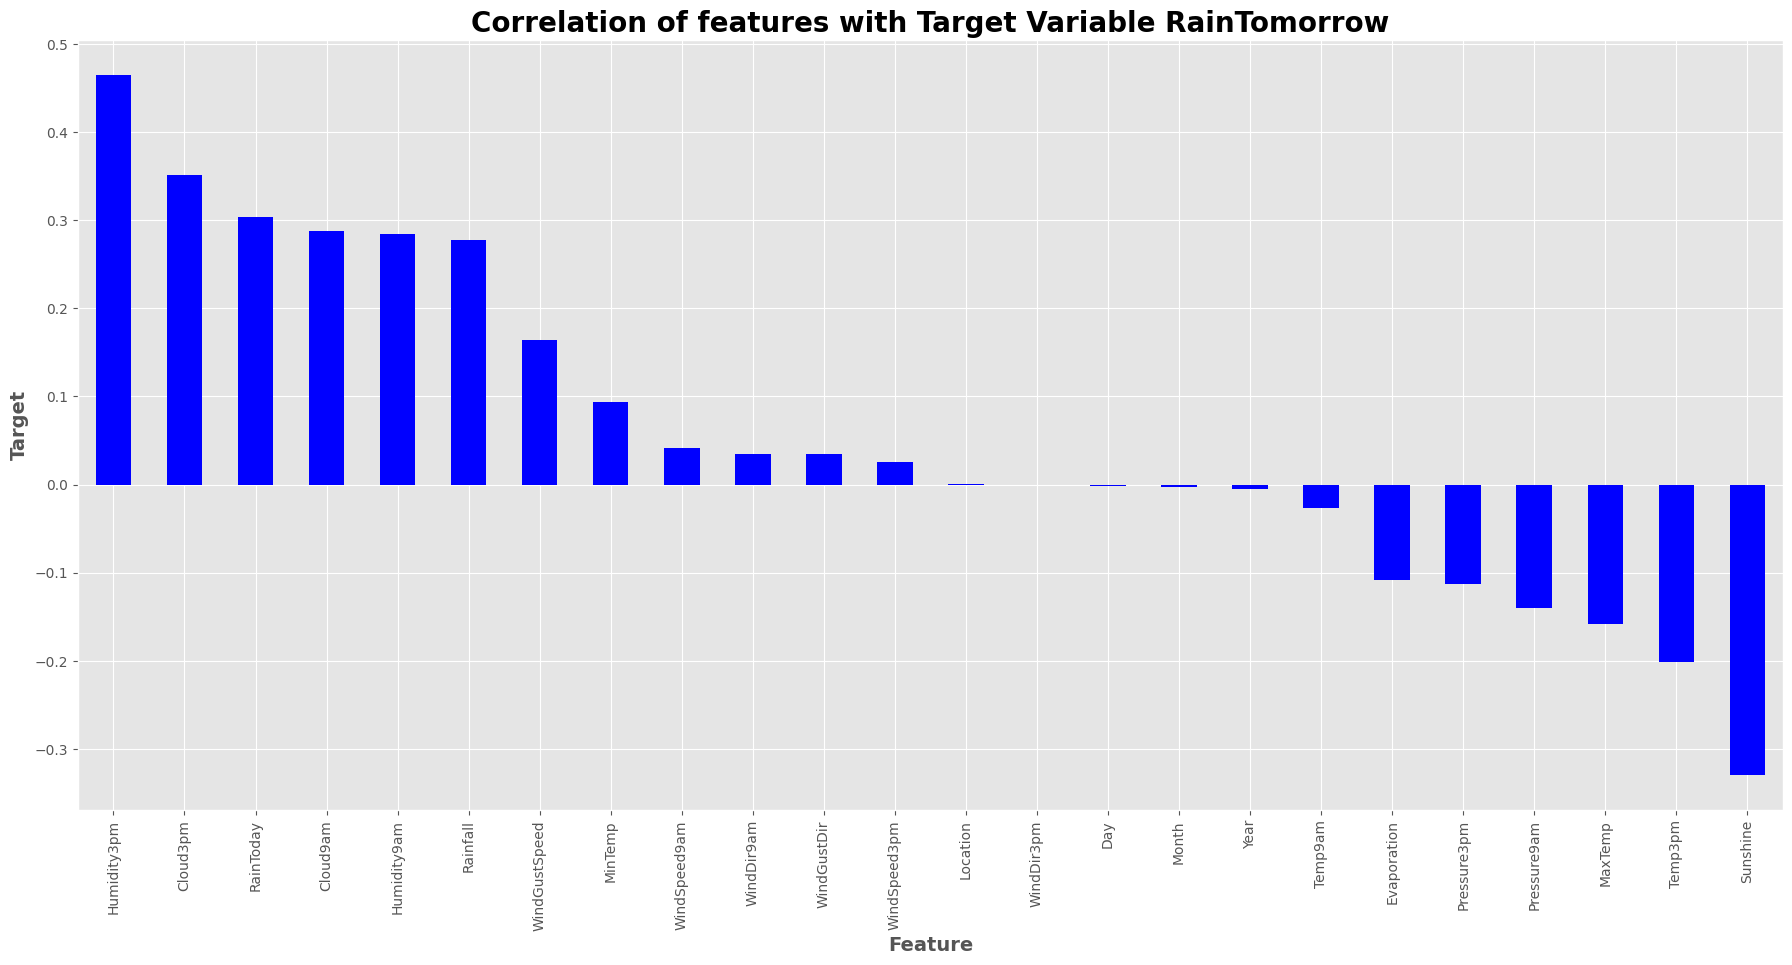

In [48]:
plt.figure(figsize=(22,10))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable RainTomorrow',fontsize=20,fontweight='bold')
plt.show()

- In the Above 2 Graphs we can see the Correlation between the features and out Output Variable

Lets check the corrleation values of features with O/P features

In [49]:
corr = df.corr()
corr['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.464801
Cloud3pm         0.351601
RainToday        0.303565
Cloud9am         0.287603
Humidity9am      0.284159
Rainfall         0.277606
WindGustSpeed    0.163628
MinTemp          0.093202
WindSpeed9am     0.041594
WindDir9am       0.034901
WindGustDir      0.034610
WindSpeed3pm     0.025175
Location         0.000418
WindDir3pm      -0.000224
Day             -0.001717
Month           -0.003259
Year            -0.004690
Temp9am         -0.026504
Evaporation     -0.108688
Pressure3pm     -0.112841
Pressure9am     -0.139575
MaxTemp         -0.158541
Temp3pm         -0.201905
Sunshine        -0.329748
Name: RainTomorrow, dtype: float64

- Humidty3pm has the highest correlation with RainTomorrow

In [50]:
corr['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.694824
Humidity9am      0.305620
Humidity3pm      0.302908
RainTomorrow     0.277606
Cloud9am         0.240989
Cloud3pm         0.198723
WindDir9am       0.120300
MinTemp          0.101291
WindGustSpeed    0.095182
WindGustDir      0.073778
WindDir3pm       0.073660
WindSpeed9am     0.039957
WindSpeed3pm     0.032481
Location         0.010711
Year             0.004145
Month           -0.001506
Day             -0.006935
Temp9am         -0.029414
Pressure3pm     -0.056897
Evaporation     -0.112222
Pressure9am     -0.117134
MaxTemp         -0.137986
Temp3pm         -0.147791
Sunshine        -0.192258
Name: Rainfall, dtype: float64

- The feature 'RainToday' has the highest correlation with "Rainfall"

### Classification Problem (Rainfall Tomorrow Prediction)

#### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [52]:
X = df.drop('RainTomorrow', axis=1)
y = df.RainTomorrow

In [53]:
y.value_counts()

0    4979
1    1430
Name: RainTomorrow, dtype: int64

- Form the Above we can see that the Dataset is Highly Imbalanced

In [54]:
## Using SMOTE to Balance the Dataset
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [55]:
y.value_counts()

0    4979
1    4979
Name: RainTomorrow, dtype: int64

- The Dataset is now Balanced

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.443582,-0.003955,-0.100673,-0.385272,0.247274,0.104162,1.287705,0.374187,1.379903,1.479412,0.903995,0.728882,0.009031,-1.775541,-1.739270,-1.417894,1.364034,-0.220330,-0.163629,-0.031679,-0.593819,-1.675521,1.783115,-1.775587
1,-1.443582,-1.118848,0.277149,-0.493750,0.247274,0.104162,1.486856,0.374187,-0.218826,1.713829,-0.893730,0.512019,-1.615445,-1.618647,-1.212895,-1.290058,-0.180100,-0.220330,-0.108937,0.406559,-0.593819,-1.559795,1.783115,-1.775587
2,-1.443582,-0.096863,0.380191,-0.493750,0.247274,0.104162,1.686008,0.533844,1.379903,1.713829,0.819879,0.945745,-1.976440,-1.357158,-1.757421,-1.125698,-0.180100,-1.258350,0.583833,0.213734,-0.593819,-1.444070,1.783115,-1.775587
3,-1.443582,-0.784380,0.775187,-0.493750,0.247274,0.104162,-0.504658,-1.222380,0.466344,-1.802436,0.050119,-0.897591,-1.555280,-2.089328,0.057663,-0.376944,-0.180100,-0.220330,0.055140,0.792209,-0.593819,-1.328344,1.783115,-1.775587
4,-1.443582,0.757888,1.513657,-0.312954,0.247274,0.104162,1.287705,0.134702,-1.360775,-0.161512,-0.437463,0.295156,0.670855,-1.200265,-1.176594,-1.618779,0.942508,1.425042,0.000448,1.353154,-0.593819,-1.212619,1.783115,-1.775587


#### Checking for Multi Collinearity betweem the columns

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.664558,Location
1,10.209674,MinTemp
2,24.332067,MaxTemp
3,2.063964,Rainfall
4,1.619373,Evaporation
5,2.153072,Sunshine
6,1.537388,WindGustDir
7,2.146702,WindGustSpeed
8,1.392493,WindDir9am
9,1.401635,WindDir3pm


In [58]:
# Droppinng features with Multi collinearity
X.drop(["Temp3pm",'Pressure9am','Temp9am'],axis=1,inplace=True)

In [59]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.659729,Location
1,4.977377,MinTemp
2,5.779857,MaxTemp
3,2.056633,Rainfall
4,1.586571,Evaporation
5,2.119685,Sunshine
6,1.516569,WindGustDir
7,2.070888,WindGustSpeed
8,1.362555,WindDir9am
9,1.312772,WindDir3pm


- There seems to be no more Multicollineairt between the features

### Model Building

In [60]:
## Importing Neccessary Libraries for classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

## Importing Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Finding the Best Random State

In [62]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 80.32128514056225 for Random State 140


### Feature Importance

,Importance
Features,
Humidity3pm,0.145
Rainfall,0.113
Cloud3pm,0.092
Sunshine,0.071
Cloud9am,0.062
Humidity9am,0.059
WindGustSpeed,0.054
Pressure3pm,0.042
MaxTemp,0.040


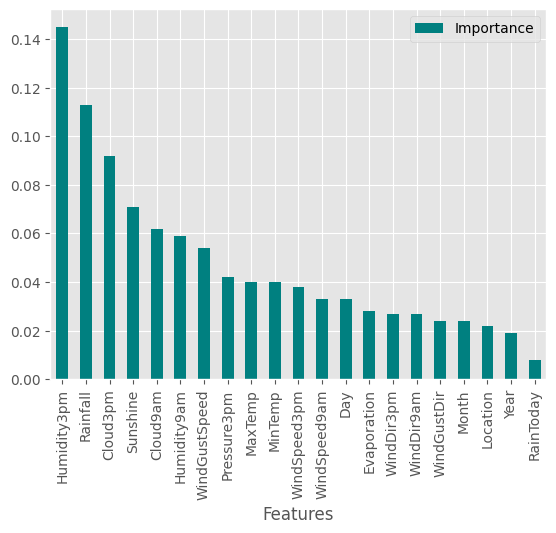

In [63]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

- Here we can see that the most important features are 'Humidity3pm' , 'rainfall', 'cloud3pm'

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=140)

In [75]:
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (7966, 21)
Training target vector size: (7966,)
Test feature matrix size: (1992, 21)
Test target vector size: (1992,)


- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'RainTomorrow'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [76]:
def Rain_tomorrow(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 140)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [77]:
model = LogisticRegression()
Rain_tomorrow(model, X, y)

Accuracy Score: 80.32128514056225

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1025
           1       0.81      0.78      0.79       967

    accuracy                           0.80      1992
   macro avg       0.80      0.80      0.80      1992
weighted avg       0.80      0.80      0.80      1992

Cross Validation Score: 70.26684336542553

Accuracy Score - Cross Validation Score is 8.899823301241128


#### Support Vector Classifier

In [78]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=129)
Rain_tomorrow(model, X, y)

Accuracy Score: 87.24899598393574

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      1025
           1       0.86      0.88      0.87       967

    accuracy                           0.87      1992
   macro avg       0.87      0.87      0.87      1992
weighted avg       0.87      0.87      0.87      1992

Cross Validation Score: 71.23144511748652

Accuracy Score - Cross Validation Score is 7.935221549180142


#### Decision Tree Classifier

In [79]:
model = DecisionTreeClassifier()
Rain_tomorrow(model, X, y)

Accuracy Score: 83.785140562249

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1025
           1       0.81      0.87      0.84       967

    accuracy                           0.84      1992
   macro avg       0.84      0.84      0.84      1992
weighted avg       0.84      0.84      0.84      1992

Cross Validation Score: 69.13248170986306

Accuracy Score - Cross Validation Score is 10.0341849568036


#### Random Forest Classifier

In [80]:
model = RandomForestClassifier(random_state=129)
Rain_tomorrow(model, X, y)

Accuracy Score: 90.56224899598394

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1025
           1       0.89      0.92      0.90       967

    accuracy                           0.91      1992
   macro avg       0.91      0.91      0.91      1992
weighted avg       0.91      0.91      0.91      1992

Cross Validation Score: 71.16141613162847

Accuracy Score - Cross Validation Score is 8.005250535038186


#### K Neigbours Classifiers

In [81]:
model=KNeighborsClassifier(n_neighbors=15)
Rain_tomorrow(model, X, y)

Accuracy Score: 84.53815261044177

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1025
           1       0.79      0.93      0.85       967

    accuracy                           0.85      1992
   macro avg       0.85      0.85      0.84      1992
weighted avg       0.86      0.85      0.84      1992

Cross Validation Score: 66.29030436159505

Accuracy Score - Cross Validation Score is 12.87636230507161


#### Extra Tree Classifier

In [82]:
model=ExtraTreesClassifier()
Rain_tomorrow(model, X, y)

Accuracy Score: 92.41967871485943

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1025
           1       0.90      0.95      0.92       967

    accuracy                           0.92      1992
   macro avg       0.92      0.92      0.92      1992
weighted avg       0.93      0.92      0.92      1992

Cross Validation Score: 71.7840220752422

Accuracy Score - Cross Validation Score is 7.382644591424452


#### XBBoost Classifier

In [83]:
model=xgb.XGBClassifier(verbosity=0)
Rain_tomorrow(model, X, y)

Accuracy Score: 90.56224899598394

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1025
           1       0.91      0.89      0.90       967

    accuracy                           0.91      1992
   macro avg       0.91      0.91      0.91      1992
weighted avg       0.91      0.91      0.91      1992

Cross Validation Score: 62.50533525362122

Accuracy Score - Cross Validation Score is 16.66133141304544


- Based on the evaluation metrics provided, the Extra Tree Classifier seems to be the best model with the highest accuracy score (92.12%) and the lowest difference between accuracy score and cross-validation score (7.58%). It also has a good precision, recall, and f1-score for both classes, indicating that it performs well in predicting both positive and negative classes.

### Hyperparameter tuning

We will use Randomized Search CV to first Narrow down.

In [84]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,500,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [85]:
rf = ExtraTreesClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=140,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=140, verbose=2)

In [86]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'entropy'}

In [87]:
best_random_grid = rf_randomcv.best_estimator_

- Use the same paramters in Grid search CV

In [89]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 50, rf_randomcv.best_params_['n_estimators'] - 30, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 30, rf_randomcv.best_params_['n_estimators'] + 50]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [1, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [950, 970, 1000, 1030, 1050]}


In [90]:
rf=ExtraTreesClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [340],
                         'max_features': ['log2'], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [950, 970, 1000, 1030, 1050]},
             verbose=2)

In [91]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 340,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 950}

In [92]:
grid_search.best_score_

0.9187769146863551

In [94]:
Final_Model = RandomForestClassifier(n_estimators=950,criterion="entropy", max_depth=340,min_samples_leaf=1 ,min_samples_split=2, n_jobs=1, random_state=900)
Classifier = Final_Model.fit(X_train, y_train)
y_pred = Final_Model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print("Accuracy score for the Best Model is:", accuracy)

Accuracy score for the Best Model is: 90.76305220883533


### AUC ROC score

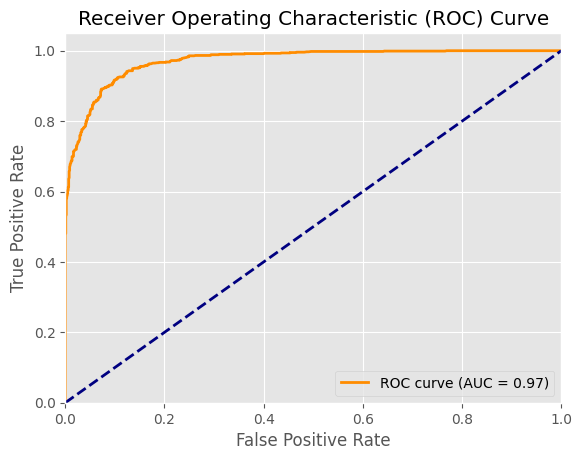

In [95]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_score = Final_Model.predict_proba(X_test)[:, 1]

# calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### - We have got a AUC score of 0.97 which is HIgh

### Confusion Matrix

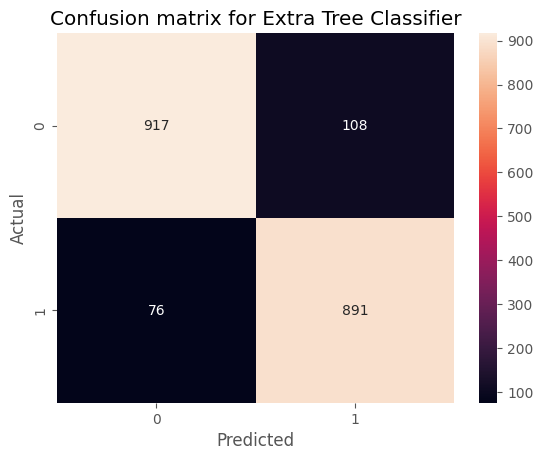

In [96]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving the Model

In [97]:
import joblib
filename = "Rainfall_Tomorrow.pkl"
joblib.dump(Final_Model, filename)

['Rainfall_Tomorrow.pkl']

### Predicting the Final Model

In [99]:
prediction = Final_Model.predict(X_test)

In [100]:
# Prediction
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1


### Regression Problem (Predicting Rainfall)

In [129]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,0.155534,-0.118386,13,44.0,13,14,0.905389,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,0.155534,-0.118386,14,44.0,6,15,-0.858881,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,0.155534,-0.118386,15,46.0,13,15,0.822838,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,0.155534,-0.118386,4,24.0,9,0,0.067403,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,0.155534,-0.118386,13,41.0,1,7,-0.411105,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


#### Splitting up the input and Output feature

In [54]:
x = df.drop('Rainfall', axis=1)
y = df.Rainfall

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [57]:
x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.391396,0.069172,-0.190821,0.155534,-0.118386,1.222524,0.483303,1.317076,1.373685,0.905389,0.756780,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675,-0.535916,-1.672284,1.655296,-1.770498
1,-1.391396,-1.013829,0.174339,0.155534,-0.118386,1.413467,0.483303,-0.222676,1.596977,-0.858881,0.536178,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675,-0.535916,-1.558519,1.655296,-1.770498
2,-1.391396,-0.021078,0.273928,0.155534,-0.118386,1.604410,0.646634,1.317076,1.596977,0.822838,0.977382,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675,-0.535916,-1.444754,1.655296,-1.770498
3,-1.391396,-0.688929,0.655685,0.155534,-0.118386,-0.495963,-1.149999,0.437218,-1.752399,0.067403,-0.897735,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675,-0.535916,-1.330989,1.655296,-1.770498
4,-1.391396,0.809223,1.369406,0.155534,-0.118386,1.222524,0.238308,-1.322499,-0.189357,-0.411105,0.315576,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675,-0.535916,-1.217224,1.655296,-1.770498



### Checking VIF (Multicolinearity)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


,VIF values,Features
0,1.658933,Location
1,9.244157,MinTemp
2,26.322226,MaxTemp
3,1.643293,Evaporation
4,2.188432,Sunshine
5,1.590691,WindGustDir
6,2.260706,WindGustSpeed
7,1.348053,WindDir9am
8,1.422001,WindDir3pm
9,2.019553,WindSpeed9am


In [61]:
# Droppinng features with Multi collinearity
x.drop(["Temp9am",'Pressure9am','MaxTemp'],axis=1,inplace=True)


#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.654400,Location
1,5.195003,MinTemp
2,1.602673,Evaporation
3,2.145758,Sunshine
4,1.572032,WindGustDir
5,2.208405,WindGustSpeed
6,1.321713,WindDir9am
7,1.353768,WindDir3pm
8,1.979291,WindSpeed9am
9,1.907971,WindSpeed3pm


- We have succesfully removed Multicollinearity

### Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.545264258214823  on Random_state  705


In [63]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_squared_error

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=705)

### Feature Importance

,Importance
Features,
RainToday,0.472
MinTemp,0.049
Humidity9am,0.048
Humidity3pm,0.036
Temp3pm,0.036
WindGustSpeed,0.035
Day,0.035
Pressure3pm,0.034
WindDir9am,0.027


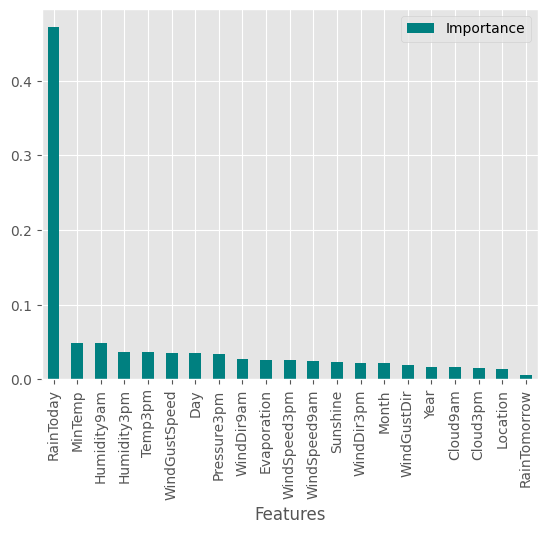

In [66]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Rainfall'
- The function will caluclate the RMSE score , r2_score , calculates the Cross-Validation score and in the end it will Calculate the Difference between the r2_score and Cross-Validation score.

In [67]:
def Rainfall(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=705)
    
    # Model Training
    model.fit(x_train, y_train)
    
    # Predicting Value using X_test
    y_pred = model.predict(x_test)
    
    # Calucalting the RMSE Score (The Lower the score the Better)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # Calcualting the R2_score
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Calculating the Cross Validation Score (The value of cv will be 5)
    Cross_Val_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", Cross_Val_score)
    
    # Difference between the r2 score and Cross_vaL_score
    result = r2 - Cross_Val_score
    print("R2 Score - Cross Validation Score is", result)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Ridge Regression

In [70]:
model=Ridge()
Rainfall(model, x, y)

RMSE Score is: 3.0241302753840076
R2 Score is: 54.52641741938441
Cross Validation Score: 48.80119594762895
R2 Score - Cross Validation Score is 5.725221471755461


#### Lasso Regression

In [71]:
model=Lasso()
Rainfall(model, x, y)

RMSE Score is: 3.216899849454721
R2 Score is: 48.544327380436826
Cross Validation Score: 43.90394948874459
R2 Score - Cross Validation Score is 4.640377891692239


#### Support Vector Machine

In [72]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
Rainfall(model, x, y)

RMSE Score is: 3.290341083587008
R2 Score is: 46.168061500980734
Cross Validation Score: 38.08514743033097
R2 Score - Cross Validation Score is 8.082914070649764


#### Decision Tree Regressor

In [73]:
model = DecisionTreeRegressor(criterion="poisson")
Rainfall(model, x, y)

RMSE Score is: 4.363912527463336
R2 Score is: 5.308662184001101
Cross Validation Score: 7.354646455507341
R2 Score - Cross Validation Score is -2.0459842715062404


#### Random Forest Regressor 

In [74]:
model = RandomForestRegressor(max_depth=2, max_features="sqrt")
Rainfall(model, x, y)

RMSE Score is: 3.468004689759046
R2 Score is: 40.197749059366316
Cross Validation Score: 33.4596761960934
R2 Score - Cross Validation Score is 6.738072863272919


#### Extra Tree Regressor

In [75]:
model = ExtraTreesRegressor()
Rainfall(model, x, y)

RMSE Score is: 3.076992569583003
R2 Score is: 52.922751293508995
Cross Validation Score: 49.655157880972375
R2 Score - Cross Validation Score is 3.2675934125366197


#### K Nieghbours Regressor

In [76]:
model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
Rainfall(model, x, y)

RMSE Score is: 3.6872829631387236
R2 Score is: 32.39619936154333
Cross Validation Score: 27.60735709129843
R2 Score - Cross Validation Score is 4.788842270244903


#### AdaBoostRegressor

In [77]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
Rainfall(model, x, y)

RMSE Score is: 3.5274838203257093
R2 Score is: 38.12884268324309
Cross Validation Score: 41.08790140231554
R2 Score - Cross Validation Score is -2.959058719072445


### Hyperparameter Using Ridge Regression

In [80]:
# Define the range of hyperparameters
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge Regression object
ridge = Ridge()

# Create a Grid Search object
grid_search = GridSearchCV(ridge, params, cv=5)

# Fit the Grid Search object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Ridge Regression object with the best hyperparameters
ridge_best = Ridge(alpha=best_params['alpha'])

# Fit the model to the training data
ridge_best.fit(x_train, y_train)

# Make predictions on the test data
y_pred = ridge_best.predict(x_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)

RMSE: 3.0241390456876
R2 Score is: 54.52615366242512


### Saving the Model

In [81]:
import joblib
joblib.dump(ridge_best,"Prediction_of_Rainfall.pkl")

['Prediction_of_Rainfall.pkl']